In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

# Wine Dataset

In [4]:
iris = load_iris()
X, y, labels = iris.data, iris.target, iris.target_names
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
print ('X[1]=\n{}'.format(X[1,:])) 

X.shape=  (150, 4)
y.shape=  (150,)
X[1]=
[4.9 3.  1.4 0.2]


In [5]:
{label: count for label, count in zip(labels, np.bincount(y))}

{np.str_('setosa'): np.int64(50),
 np.str_('versicolor'): np.int64(50),
 np.str_('virginica'): np.int64(50)}

# Make it imbalanced

In [6]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
{label: count for label, count in zip(labels, np.bincount(y_binary_imbalanced))}

{np.str_('setosa'): np.int64(100), np.str_('versicolor'): np.int64(50)}

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)

X_train.shape=  (112, 4)
X_test.shape=  (38, 4)
y_train.shape=  (112,)
y_test.shape=  (38,)


In [8]:
print ('Train Set:',{label: count for label, count in zip(labels, np.bincount(y_train))})
print ('Test Set:',{label: count for label, count in zip(labels, np.bincount(y_test))})

Train Set: {np.str_('setosa'): np.int64(78), np.str_('versicolor'): np.int64(34)}
Test Set: {np.str_('setosa'): np.int64(22), np.str_('versicolor'): np.int64(16)}


In [9]:
train_labels= {label: count for label, count in zip(labels, np.bincount(y_train))}
print ('train ratio: ',list(train_labels.values())[1]/list(train_labels.values())[0])
test_labels= {label: count for label, count in zip(labels, np.bincount(y_test))}
print ('test ratio: ', list(test_labels.values())[1]/list(test_labels.values())[0])

train ratio:  0.4358974358974359
test ratio:  0.7272727272727273


# Accuracy of SVC

In [10]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=0.06, probability=True).fit(X_train, y_train)

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 69.643%
test accuracy= 57.895%


# Accuracy of Dummy classifier

In [14]:
from sklearn.dummy import  DummyClassifier
clf_dummy_majority= DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
print ('Check it predicts all zeros:')
clf_dummy_majority.predict(X_test)[:30]

Check it predicts all zeros:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
print("train accuracy= {:.3%}".format(clf_dummy_majority.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf_dummy_majority.score(X_test, y_test)))
clf_dummy_majority= clf

train accuracy= 69.643%
test accuracy= 57.895%


In [16]:
clf = SVC().fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))
clf_svc = clf

train accuracy= 95.536%
test accuracy= 94.737%


In [17]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train) 
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))
clf_svc = clf

train accuracy= 75.893%
test accuracy= 63.158%


In [18]:
print("train accuracy = {:.3%}".format(clf_dummy_majority.score(X_train, y_train)))
print("test accuracy  = {:.3%}".format(clf_dummy_majority.score(X_test, y_test)))

train accuracy = 69.643%
test accuracy  = 57.895%


# Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test)

array([[22,  0],
       [ 0, 16]])

# Dummy most majority

In [20]:
y_dummy_majority= clf_dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy_majority)
confusion

array([[22,  0],
       [16,  0]])

# Dummy stratified

In [22]:
clf = DummyClassifier (strategy='stratified', random_state=2020)
clf.fit(X_train,y_train)
y_dummy_stratified = clf.predict(X_test)
confusion_matrix(y_test, y_dummy_stratified )

array([[18,  4],
       [11,  5]])

# SVC

In [23]:
y_svc= clf_svc.predict(X_test)
confusion_matrix(y_test, y_svc)

array([[21,  1],
       [13,  3]])

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(C=0.001).fit (X_train, y_train)
y_lr= clf.predict(X_test)
confusion_matrix(y_test, y_lr)

array([[22,  0],
       [16,  0]])

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
y_dt = clf.predict(X_test)
confusion_matrix(y_test, y_dt)

array([[22,  0],
       [ 1, 15]])

In [27]:
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    positive_indices = (y == 1)
    negative_indices = (y == 0)
    import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)
    
def draw_linear_decision_boundaries_multiclass(clf,X):
    colors=  ['green','grey', 'orange', 'brown']
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)

    
def plot_decision_boundary_universal(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =None, is_to_show_train= True):
    from matplotlib.colors import  ListedColormap
    features_number= X_train.shape[1]
    colors_for_areas= colors_for_points =  np.array(['grey', 'orange', 'green', 'brown'][:features_number])
    cmap_light = ListedColormap(colors_for_areas)

    mesh_step_size = precision
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    if precision<0.05:
        print ('Calling to predict for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    Z = Z.reshape(xx1.shape)

    if ax:
        plt.sca(ax)

    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    if is_to_show_train:
        plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size,
                    c=colors_for_points[y_train.astype(int)], edgecolor = 'black',alpha=0.6)
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size,
                c=colors_for_points[y_test.astype(int)],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        if labels is None:
            labels= ['negative','positive']
        import matplotlib.patches as mpatches
        patches= [mpatches.Patch(color=colors_for_points[i], label=labels[i]) for i in range (len(labels))]
        plt.legend(handles=patches)
        if features is None:
            plt.xlabel('feature 1')
            plt.ylabel('feature 2')
        else: 
            plt.xlabel(features[0])
            plt.ylabel(features[1])

    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False,
        labelbottom = False
        )
    plt.title(title)

# Synthetic dataset

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
from sklearn.datasets import make_blobs
X_mk8, y_mk8 = make_blobs(n_samples = 300, n_features = 3, centers = 6, 
                       cluster_std = 8, random_state = 10)
X = X_mk8
y = y_mk8 == 5
plt.figure()
plot_data_logistic_regression(X,y, title='make_blobs imbalanced')

# Logistic Regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
plt.show()

print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))

train accuracy= 83.111%
test accuracy= 82.667%


# Perfromance on test set

In [37]:
y_predicted = clf.predict(X_test)
print ('confusion_matrix:\n',confusion_matrix(y_test, y_predicted))
print ('recall_score = {:.2}\nprecision_score = {:.2}'.format(
    recall_score(y_test, y_predicted),precision_score(y_test, y_predicted)))

confusion_matrix:
 [[62  0]
 [13  0]]
recall_score = 0.0
precision_score = 0.0


c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Probabilty of prediction

In [38]:
clf = LogisticRegression().fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
y_pedicted = clf.predict(X_test)
df_proba = pd.DataFrame({'true_value':  y_test, 'predicted': y_predicted,'probability of 0': y_proba[:,0],'probability of 1': y_proba[:,1]})
df_proba.sample(10, random_state=10)

,true_value,predicted,probability of 0,probability of 1
67,False,False,0.772794,0.227206
26,False,False,0.961604,0.038396
21,True,False,0.842683,0.157317
3,False,False,0.673281,0.326719
44,False,False,0.825064,0.174936
41,True,False,0.787292,0.212708
6,False,False,0.928295,0.071705
20,False,False,0.940702,0.059298
2,False,False,0.804233,0.195767
59,False,False,0.875966,0.124034


# Changing threshold of prediction

In [39]:
clf.predict_proba(X[:10])

array([[0.89427535, 0.10572465],
       [0.94401374, 0.05598626],
       [0.93861599, 0.06138401],
       [0.95660296, 0.04339704],
       [0.94501898, 0.05498102],
       [0.91034114, 0.08965886],
       [0.79196436, 0.20803564],
       [0.84761425, 0.15238575],
       [0.78279913, 0.21720087],
       [0.77860465, 0.22139535]])

# Decision function

In [40]:
clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_test)
y_pedicted = clf.predict(X_test)

df_dec_func = pd.DataFrame({'true_value':  y_test, 'predicted': y_predicted,'score': y_score})
df_dec_func.sample(10, random_state=10)

,true_value,predicted,score
67,False,False,-1.224156
26,False,False,-3.220660
21,True,False,-1.678326
3,False,False,-0.723060
44,False,False,-1.551044
41,True,False,-1.308680
6,False,False,-2.560785
20,False,False,-2.764043
2,False,False,-1.412962
59,False,False,-1.954776


# Accuracy, Recall, Precision, F1-score

In [41]:
y_predicted = clf.predict(X_test)
print ('accuracy = {:.2}'.format(accuracy_score(y_test, y_predicted)))
print ('precision = {:.2}'.format(precision_score(y_test, y_predicted)))
print ('recall = {:.2}'.format(recall_score(y_test, y_predicted)))
print ('f1_score  = {:.2}'.format(f1_score(y_test, y_predicted)))

accuracy = 0.83
precision = 0.0
recall = 0.0
f1_score  = 0.0


c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Classification report

In [42]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        62
    Positive       0.00      0.00      0.00        13

    accuracy                           0.83        75
   macro avg       0.41      0.50      0.45        75
weighted avg       0.68      0.83      0.75        75



c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Classification report for dummy stratified classifier

In [43]:
clf = DummyClassifier (random_state=0).fit(X_train,y_train)
y_predicted = clf.predict(X_test)
print (confusion_matrix(y_test, y_predicted))
print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

[[62  0]
 [13  0]]
              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        62
    Positive       0.00      0.00      0.00        13

    accuracy                           0.83        75
   macro avg       0.41      0.50      0.45        75
weighted avg       0.68      0.83      0.75        75



c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\denis\miniconda3\envs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_train)
thresholds = np.linspace(y_score.min()/4, y_score.max()/3.7, 20)

recall = []
precision= []
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
for threshold in  thresholds:
    clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold
    recall.append(recall_score(y_train,clf.predict(X_train)))
    precision.append(precision_score(y_train,clf.predict(X_train)))
df = pd.DataFrame({'threshold':  thresholds, 'recall': recall,'precision': precision})


plt.plot(precision, recall, '-o', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.gca().set_aspect('equal')
df.groupby(['recall','precision']).last().reset_index().sort_values('threshold').set_index('threshold')

,recall,precision
threshold,,
0.001608,1.0,0.164444


closest_zero threshold : 0.005948214062771795


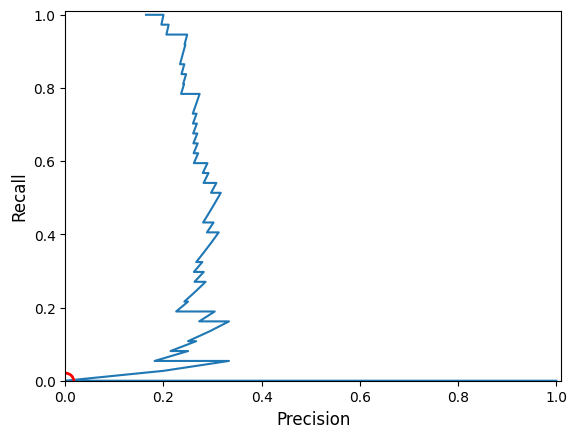

In [50]:
from sklearn.metrics import precision_recall_curve

y_score = clf.decision_function(X_train)
precision, recall, thresholds = precision_recall_curve(y_train, y_score)

# print ('precision\n', precision)
# print ('recall:\n', recall)
# print ('thresholds:\n', thresholds)
closest_zero = np.argmin(np.abs(thresholds))
print ('closest_zero threshold : {}'.format(thresholds [closest_zero]))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, '-', markersize = 4, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=2)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.show(4)

# Receiver operating characteristic (ROC) curve

In [51]:
from sklearn.metrics import roc_curve, auc

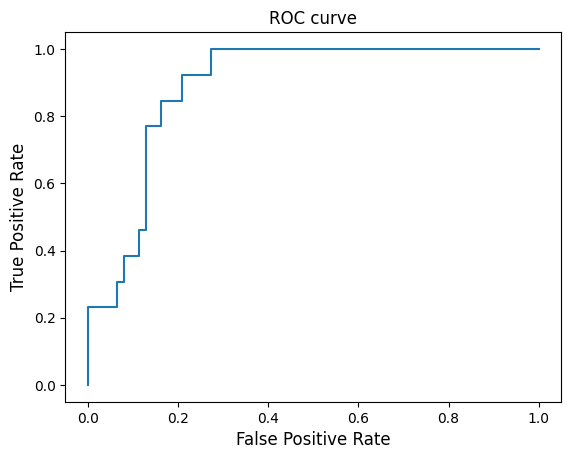

In [52]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.figure()
plt.plot(fpr, tpr, '-', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title ('ROC curve')
plt.show(1)

# AUC score

In [53]:
plt.fill_between(fpr,0,tpr, facecolors='orange',alpha=0.25)
roc_auc = auc(fpr, tpr)
print ('roc_auc = {:.4}'.format(roc_auc))

roc_auc = 0.8908


# Direct roc_auc_score function

In [54]:
from sklearn.metrics import roc_auc_score
y_score= clf.decision_function(X_test)
print('AUC: ', roc_auc_score(y_test, y_score)) 
y_score

AUC:  0.8908188585607941


array([-1.95262447, -2.74544509, -1.41296227, -0.72306016, -1.32147726,
       -2.57348547, -2.56078481, -1.53579502, -1.00306328, -2.76055662,
       -1.17351444, -2.09927294, -1.31482635, -2.64013512, -2.23384936,
       -1.44271471, -2.21961928, -0.95743824, -1.70378107, -1.85974694,
       -2.76404282, -1.6783256 , -3.63054656, -2.31918017, -1.83807654,
       -1.19248417, -3.22066   , -3.47054213, -1.56089956, -1.44560082,
       -2.21868817, -2.44847905, -1.28205354, -2.95617567, -1.3412818 ,
       -2.10834841, -1.87365177, -2.63206941, -2.56555494, -2.31780735,
       -0.38673932, -1.30867953, -1.36692614, -1.516958  , -1.55104354,
       -1.32297681, -2.36807108, -2.34379159, -1.71601053, -1.6312128 ,
       -3.61758146, -2.03541213, -0.22521229, -2.76337858, -1.8750042 ,
       -1.15336988, -1.5146299 , -2.3293268 , -1.81484807, -1.95477582,
       -3.43745842, -1.94670237, -2.86564734, -2.49466655, -3.09253823,
       -2.54890947, -0.45048812, -1.22415593, -1.54722959, -1.63

# Multi-class confusion matrix

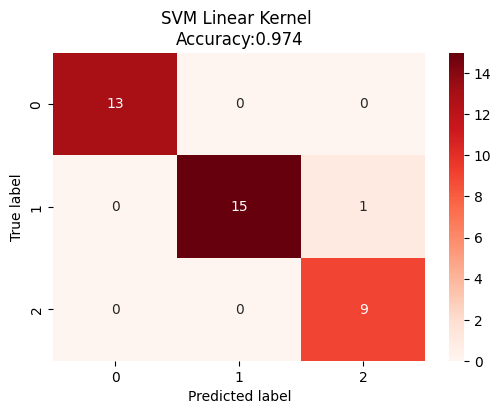

In [56]:
import seaborn as sns

iris = load_iris()
X, y, labels = iris.data, iris.target, iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
df = pd.DataFrame(confusion,index = np.arange(3), columns = np.arange(3))

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap='Reds')
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(2)

# RBF kernel

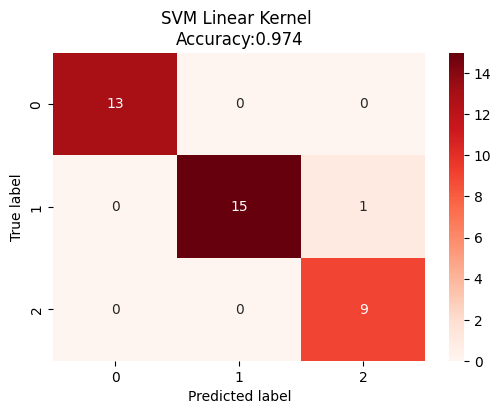

In [57]:
clf = SVC().fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
df = pd.DataFrame(confusion,index = np.arange(3), columns = np.arange(3))

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap='Reds')
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(1)

# Classification report

In [58]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Average metrics

# Average precision

In [59]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, y_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, y_predicted, average = 'macro')))

Micro-averaged precision = 0.97 (treat instances equally)
Macro-averaged precision = 0.97 (treat classes equally)


# Average F1- score

In [60]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, y_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, y_predicted, average = 'macro')))

Micro-averaged f1 = 0.97 (treat instances equally)
Macro-averaged f1 = 0.97 (treat classes equally)


# Cross validation score

In [61]:
from sklearn.model_selection import cross_val_score

iris = load_iris()
X, y, labels = iris.data, iris.target, iris.target_names
y = y == 1
clf = SVC(kernel='linear', C=1)

print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5, scoring = 'accuracy'))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

np.average(cross_val_score(clf, X, y, cv=10))

Cross-validation (accuracy) [0.73333333 0.83333333 0.56666667 0.53333333 0.66666667]
Cross-validation (AUC) [0.78  0.89  0.69  0.63  0.785]
Cross-validation (recall) [0.2 0.5 0.3 0.6 0.4]


np.float64(0.68)

In [62]:
from sklearn.metrics import get_scorer_names
print(sorted(get_scorer_names()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

# Regression metrics

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (r2_score, mean_absolute_error,
                            mean_squared_error, root_mean_squared_error)
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = np.random.rand(40, 1) * 40  
y = 0.09 * X**2 - 2 * X + 15 + np.random.randn(40, 1) 

X_train = X[:30]
y_train = y[:30]
X_test = X[30:]
y_test = y[30:]

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [65]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R-Squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-Squared (R2): 0.555203457603656
Mean Absolute Error (MAE): 10.553211674888162
Mean Squared Error (MSE): 138.20914961351545
Root Mean Squared Error (RMSE): 11.756238752828876


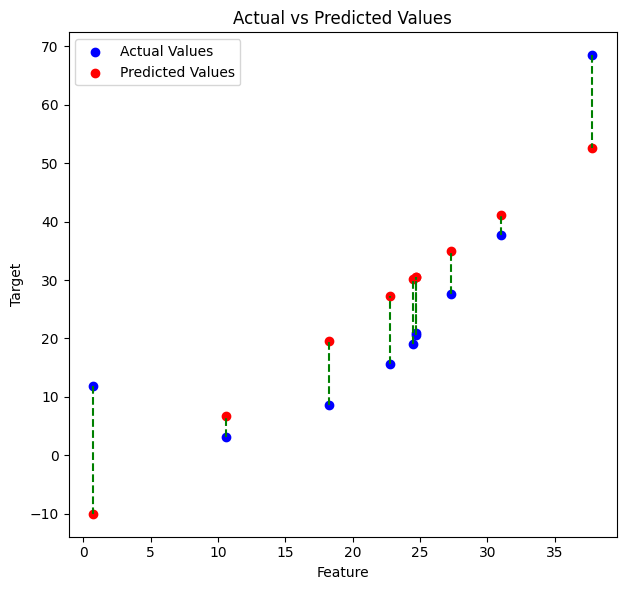

In [66]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')

for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='green', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()